In [4]:
import pandas as pd
import numpy as np
import io
import warnings
warnings.filterwarnings(action='ignore')


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("../data/complete.csv",encoding="utf-8")
df.head()


,date,GDP,Economic growth rate,Regular Gasoline,Diesel for automobiles,population,Car registration,Min wage,Min wage increase rate,City bus trunk line,...,Texi,Model texi,Consumer price,Interest rate,Number of employed,Export amount,Export growth rate,Import amount,Import growth rate,Traffic rate
0,2015-01-01,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5400081.5
1,2015-01-02,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5220255.0
2,2015-01-03,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,4480084.5
3,2015-01-04,394273.0,2.4,1568.65,1383.99,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5486275.0
4,2015-01-05,394273.0,2.4,1531.05,1351.25,10045027,3056588.0,5580,7.1,1200,...,3000,5000,94.643,0.02,516.65,45105389,-1.0,39283025,-12.2,5831397.0


Cross-validation scores: [0.93055556 0.92426584 0.9366306  0.93508501 0.94590417]
Mean cross-validation accuracy: 0.9344882363043105


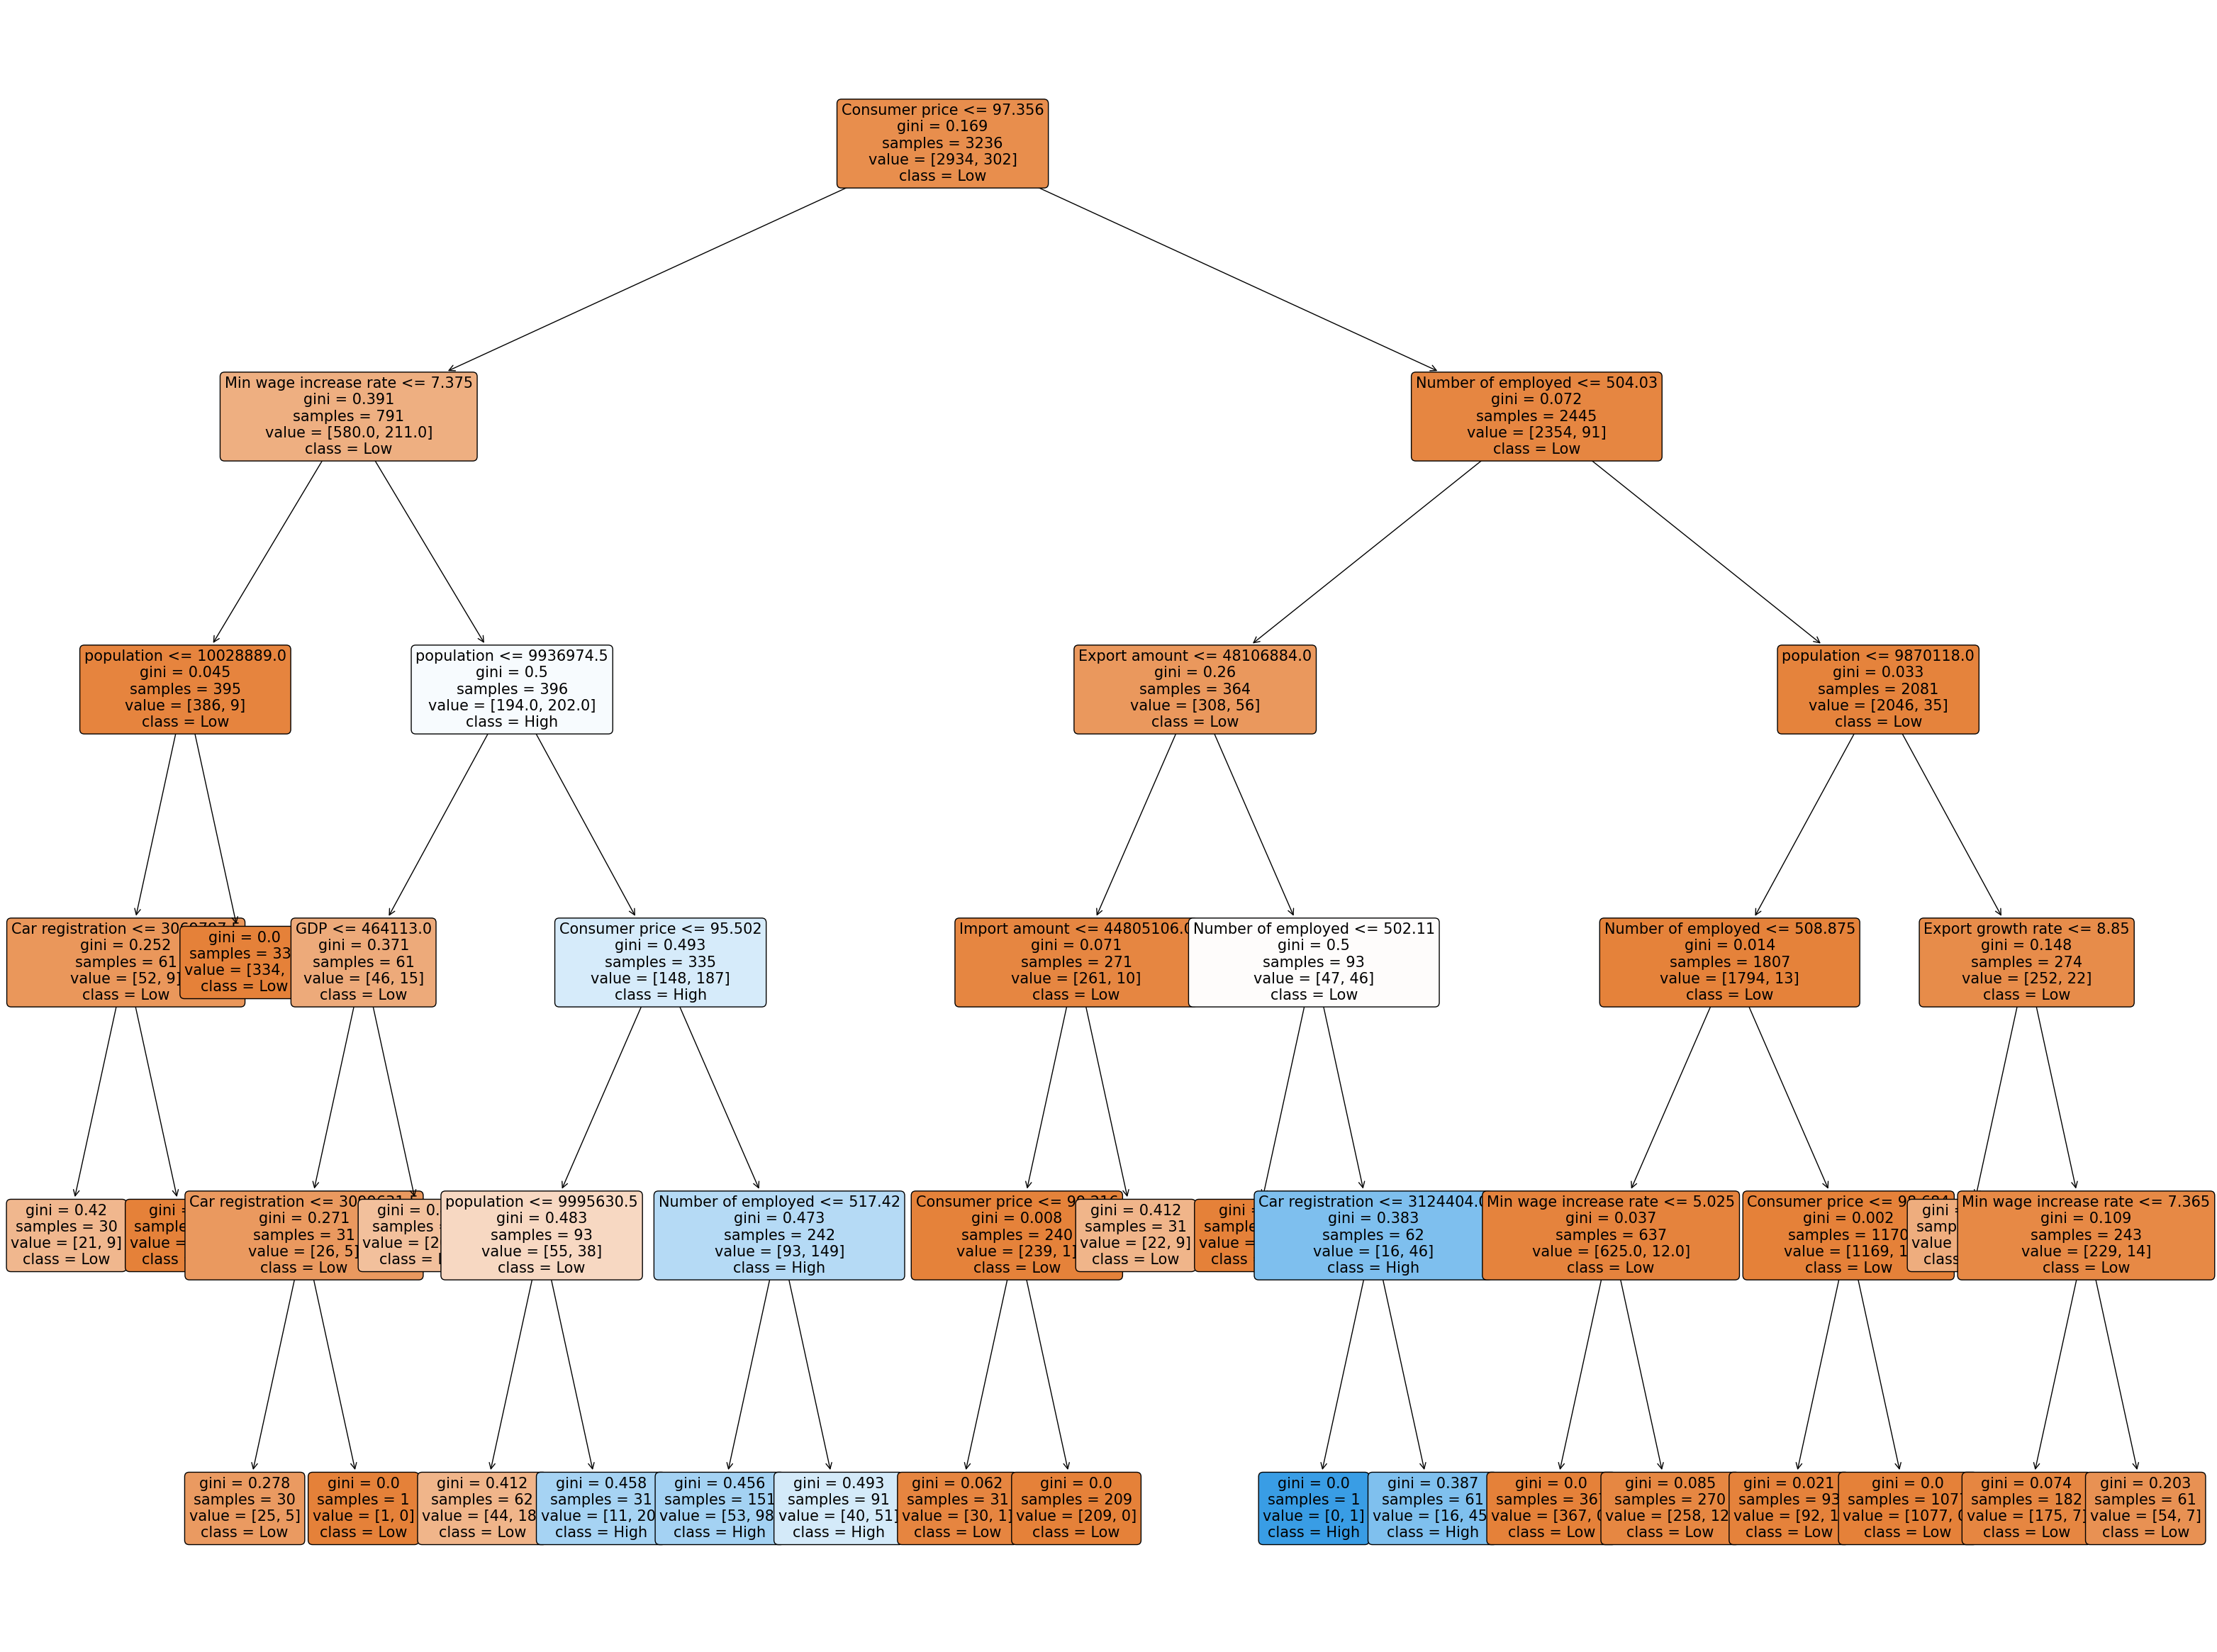

In [6]:
# 한 번만 실행
df.drop(columns='date',inplace=True)

## Calculate the correlation matrix
correlation_matrix = df.corr()
target_column = 'Traffic rate'  # Assuming we are predicting Traffic rate
correlation_threshold = 0.1

# Get columns with correlation higher than the threshold
high_corr_columns = correlation_matrix[abs(correlation_matrix[target_column]) > correlation_threshold].index
df_high_corr = df[high_corr_columns]

# Check for missing values in the dataframe
missing_values = df_high_corr.isnull().sum()

# Drop rows with missing values
df_high_corr_clean = df_high_corr.dropna()

# Binarize the target for simplicity
df_high_corr_clean['Traffic rate'] = pd.cut(df_high_corr_clean['Traffic rate'], bins=2, labels=[0, 1])

# Prepare the dataset for the decision tree classifier
X_class = df_high_corr_clean.drop(columns=['Traffic rate'])
y_class = df_high_corr_clean['Traffic rate']

# Initialize the decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(decision_tree_classifier, X_class, y_class, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {np.mean(cv_scores)}')

# Train the model on the entire dataset and visualize the decision tree
decision_tree_classifier.fit(X_class, y_class)
plt.figure(figsize=(40, 30))
plot_tree(decision_tree_classifier, feature_names=X_class.columns, filled=True, rounded=True, class_names=['Low', 'High'], fontsize=15)
plt.show()